In [1]:
from prettytable import PrettyTable
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [2]:
damping_factor = 0.85
epsilon = 0.000001
input_file_path = "input.xml" 

root = ET.parse(input_file_path).getroot()

# nodes
nodes = root.findall("node")
nodes_items = dict()
number_of_nodes = len(nodes)

# edges
edges = root.findall("edge")
edges_items = dict()

for tag,i in zip(nodes,range(number_of_nodes)):
    nodes_items[tag.get("id")] = i
    edges_items[tag.get("id")] = list()
    
for tag in edges:
    edges_items[tag.get("source")].append(tag.get("target"))

T = np.zeros((len(nodes_items),len(nodes_items)),dtype=float)
D = np.zeros((len(nodes_items),len(nodes_items)),dtype=float)
R = np.full(number_of_nodes, 1/number_of_nodes)
S = np.zeros(len(nodes_items),dtype=float)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_6

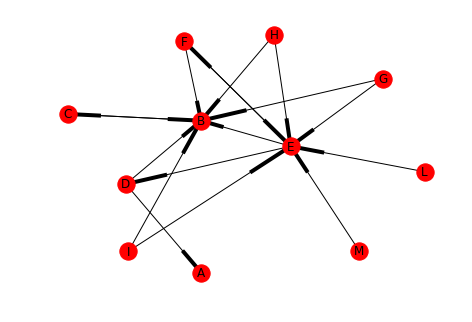

In [3]:
# display
G=nx.DiGraph()
G.add_nodes_from(list(nodes_items.keys()))
edges_list = list()

for node_item in nodes_items:
    for edge_item in edges_items[node_item]:
        edges_list.append((node_item,edge_item))

G.add_edges_from(edges_list)
nx.draw(G, with_labels = True)
plt.show()

In [4]:
# Transportation
for i,node_item in zip(range(number_of_nodes),nodes_items):
    for edge_item in edges_items[node_item]:
        T[i][list(nodes_items.keys()).index(edge_item)] = damping_factor
    if nodes_items[node_item] != 0:
        T[i] /= len(edges_items[node_item])

In [5]:
# Teleportation
for i,node_item in zip(range(number_of_nodes),nodes_items):
    if len(edges_items[node_item]) == 0:
        D[i] = 1/number_of_nodes
    else:
        D[i] = (1-damping_factor)/number_of_nodes

In [6]:
# Final probabilities for the random surfer      
P = T + D

In [7]:
norm = 1
eposh = 0

table = PrettyTable()
fields = [""]
fields.extend(list(nodes_items.keys()))
table.field_names = fields

while norm > epsilon:
    row = ["step " + str(eposh)]
    row.extend(np.around(R, decimals=4).tolist())
    table.add_row(row)

    for i in range(number_of_nodes):
        S[i] = np.sum(R * P[:,i])
        
    norm = np.linalg.norm(S - R)
    R = S.copy()
    eposh += 1

final_row = ["final"]
final_row.extend([str(i) + "%" for i in np.around((R*100), decimals=4).tolist()])
table.add_row(final_row)
print(table)

+---------+---------+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|         |    A    |    B     |    C    |    D    |    E    |    F    |    G    |    H    |    I    |    L    |    M    |
+---------+---------+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|  step 0 |  0.0909 |  0.0909  |  0.0909 |  0.0909 |  0.0909 |  0.0909 |  0.0909 |  0.0909 |  0.0909 |  0.0909 |  0.0909 |
|  step 1 |  0.0593 |  0.3169  |  0.0979 |  0.0464 |  0.3298 |  0.0464 |  0.0207 |  0.0207 |  0.0207 |  0.0207 |  0.0207 |
|  step 2 |  0.0379 |  0.2607  |  0.2876 |  0.1116 |  0.0994 |  0.1116 |  0.0182 |  0.0182 |  0.0182 |  0.0182 |  0.0182 |
|  step 3 |  0.064  |  0.4073  |  0.2382 |  0.0447 |  0.1182 |  0.0447 |  0.0166 |  0.0166 |  0.0166 |  0.0166 |  0.0166 |
|  step 4 |  0.0376 |  0.3137  |  0.3648 |  0.0521 |  0.0869 |  0.0521 |  0.0186 |  0.0186 |  0.0186 |  0.0186 |  0.0186 |
|  step 5 |  0.0